In [72]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from mlxtend.regressor import StackingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import cross_validation, metrics

In [73]:
train=pd.read_csv("train_ready_for_model.csv",encoding='latin-1')
test = pd.read_csv("test_ready_for_model.csv",encoding='latin-1')
ss = pd.read_csv("solution.csv",encoding='latin-1')
actual=ss['x1'].values

In [74]:
target = 'y'
IDcol = ['x1']
from sklearn import cross_validation, metrics

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=10, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Mape    
    print("MAPE_Train",np.mean(np.abs((dtrain[target].values-dtrain_predictions)/dtrain[target])*100))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #if (ss.x1==dtest.x1):
        
        
    print("MAPE_Test",np.mean(np.abs((actual-dtest[target].values)/actual)*100))
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

MAPE_Train 61.78229803074868
MAPE_Test 88.50608215219806


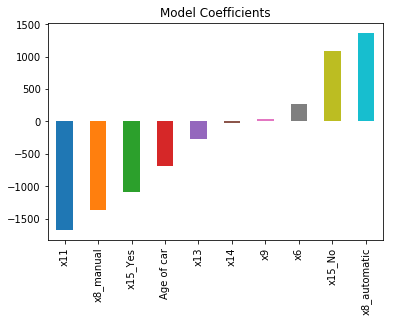

In [75]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'lr.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

MAPE_Train 59.05460025054904
MAPE_Test 88.52418943902549


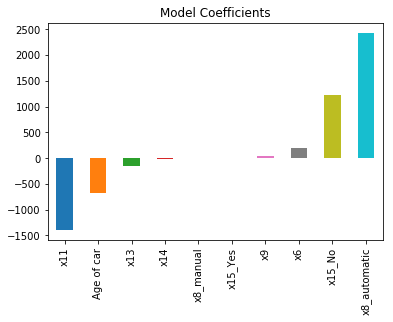

In [76]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg1 = Lasso(alpha = 1,normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'lasso.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

MAPE_Train 60.02846739682533
MAPE_Test 88.63828897159722


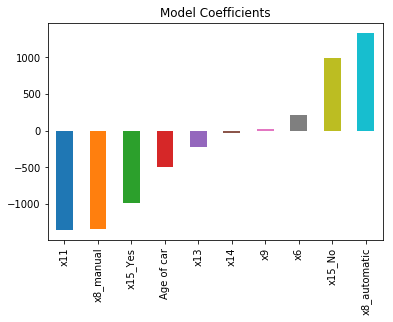

In [77]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg1 = Ridge(alpha = 0.5,normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'ridge.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

MAPE_Train 61.742082518154774
MAPE_Test 88.50626194921824


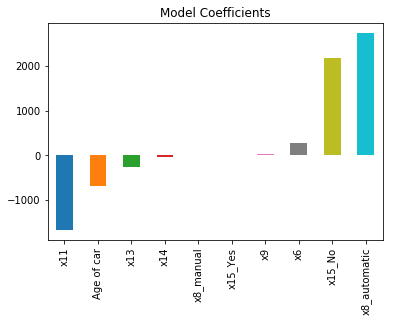

In [78]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg1 = ElasticNet(alpha=0.01,l1_ratio=1,normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'elastic.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [80]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
for i in range(1,10):
    print('k:',i)
    alg1 = KNeighborsRegressor(n_neighbors=i)
    modelfit(alg1, train, test, predictors, target, IDcol, 'KNN.csv')
#coef1 = pd.Series(alg1.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')

k: 1
MAPE_Train 12.920734152717946
MAPE_Test 89.1603711044415
k: 2
MAPE_Train 19.021322461183026
MAPE_Test 89.13897931455342
k: 3
MAPE_Train 20.96520978592416
MAPE_Test 89.16366950587171
k: 4
MAPE_Train 22.31284687964275
MAPE_Test 89.16443686329538
k: 5
MAPE_Train 23.387639876075898
MAPE_Test 89.17083898068077
k: 6
MAPE_Train 24.256917640146934
MAPE_Test 89.1805893039545
k: 7
MAPE_Train 25.05381449624802
MAPE_Test 89.18343260358978
k: 8
MAPE_Train 25.745015720240165
MAPE_Test 89.19191094753914
k: 9
MAPE_Train 26.308233957181155
MAPE_Test 89.20547939386822


In [40]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg1 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg1, train, test, predictors, target, IDcol, 'Destree.csv')
#coef1 = pd.Series(alg1.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')

MAPE_Train 32.85890217836155
MAPE_Test 88.99478156466036


In [41]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg1 = RandomForestRegressor(n_estimators=200,max_depth=15, min_samples_leaf=100)
modelfit(alg1, train, test, predictors, target, IDcol, 'Random.csv')
#coef1 = pd.Series(alg1.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')

MAPE_Train 33.02627073364442
MAPE_Test 88.97737473675491


In [48]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg1 = AdaBoostRegressor(n_estimators=200)
modelfit(alg1, train, test, predictors, target, IDcol, 'adaboost.csv')
#coef1 = pd.Series(alg1.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')

MAPE_Train 117.47616509926254
MAPE_Test 84.03092674330284


MAPE_Train 62.000162160082546
MAPE_Test 87.9532825306471


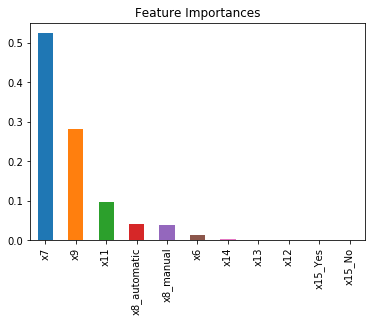

In [52]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='exponential',
         n_estimators=100, random_state=None)
modelfit(alg5, train, test, predictors, target, IDcol, 'adaBoostExpo.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

MAPE_Train 22.23853455081345
MAPE_Test 89.04988816794359


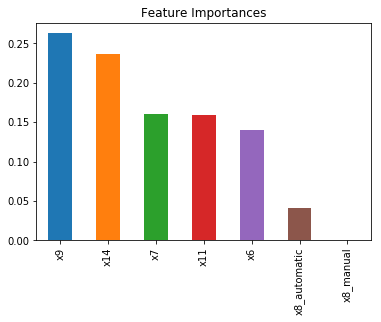

In [53]:
import xgboost as xgb
predictors = coef5.index[:7]
alg5 = xgb.XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.05)
modelfit(alg5, train, test, predictors, target, IDcol, 'xgb.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')